In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [46]:
data = pd.read_csv('data_train_diabetes_health_indicators.csv')
data = data.drop('Unnamed: 0', axis=1)

In [47]:
data.shape

(47276, 22)

In [48]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,2,1,1.0,1,32.0,1.0,0.0,1.0,1,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,0,0,1.0,1,28.0,0.0,0.0,0.0,0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,0,0,1.0,1,24.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,2,1,1.0,1,38.0,0.0,0.0,0.0,1,0,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,0,0,1.0,1,30.0,0.0,0.0,0.0,0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47276 entries, 0 to 47275
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          47276 non-null  int64  
 1   HighBP                47276 non-null  int64  
 2   HighChol              47276 non-null  float64
 3   CholCheck             47276 non-null  int64  
 4   BMI                   47276 non-null  float64
 5   Smoker                47276 non-null  float64
 6   Stroke                47276 non-null  float64
 7   HeartDiseaseorAttack  47276 non-null  float64
 8   PhysActivity          47276 non-null  int64  
 9   Fruits                47276 non-null  int64  
 10  Veggies               47276 non-null  int64  
 11  HvyAlcoholConsump     47276 non-null  int64  
 12  AnyHealthcare         47276 non-null  int64  
 13  NoDocbcCost           47276 non-null  float64
 14  GenHlth               47276 non-null  float64
 15  MentHlth           

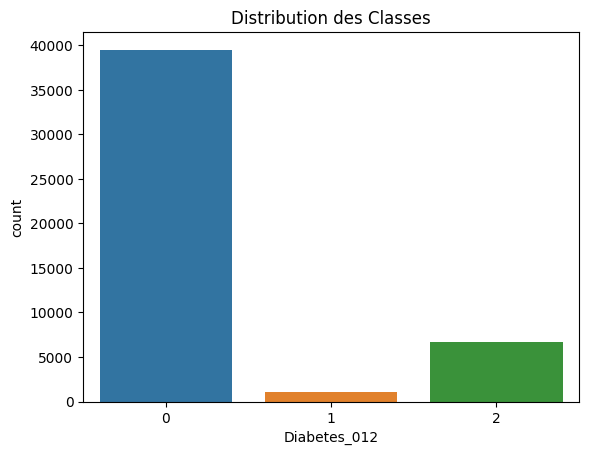

In [50]:
sns.countplot(x='Diabetes_012', data=data)
plt.title('Distribution des Classes')
plt.show()

In [51]:
data['Diabetes_012'] = data['Diabetes_012'].astype(int)

In [52]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,...,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000
mean,0.305800,0.419325,0.401980,0.964337,28.939081,0.408114,0.038265,0.085752,0.781284,0.619807,...,0.962899,0.062696,2.473560,3.929245,3.761126,0.152720,0.476986,7.887829,5.142482,6.931191
std,0.703757,0.493454,0.490303,0.185450,6.562661,0.491490,0.191837,0.280000,0.413380,0.485439,...,0.189012,0.242417,1.027017,7.861948,8.239428,0.359721,0.499475,3.227736,0.945945,2.376979
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [53]:
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

In [54]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [55]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Les données maintenant équilibrées
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

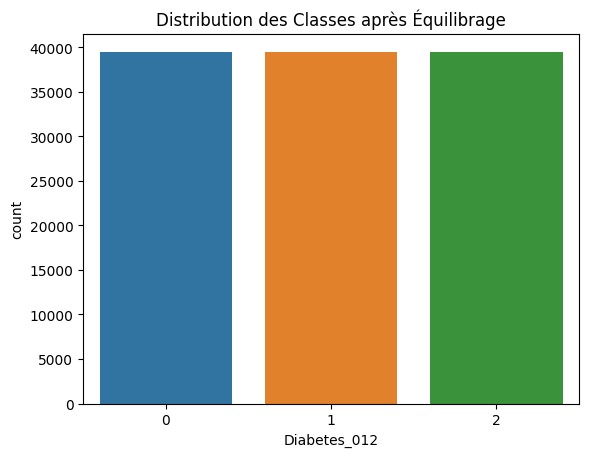

In [56]:
sns.countplot(x='Diabetes_012', data=balanced_data)
plt.title('Distribution des Classes après Équilibrage')
plt.show()

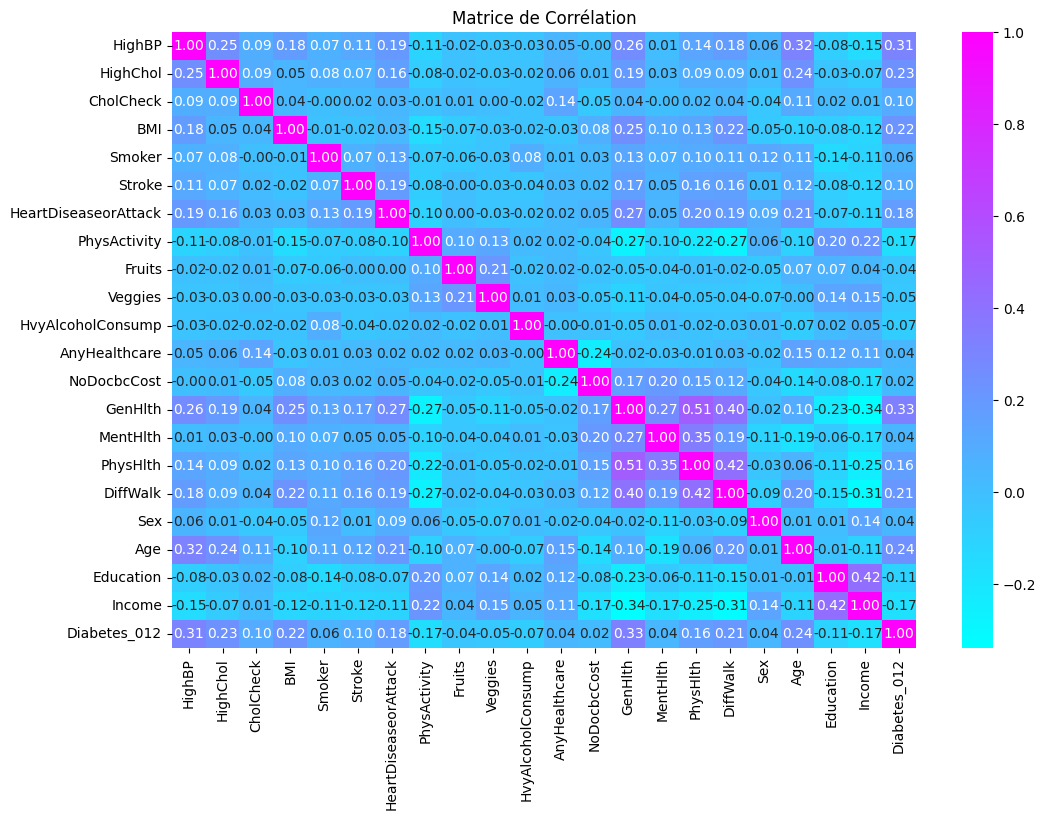

In [57]:
correlation_matrix = balanced_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

In [58]:

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [59]:
# Création du modèle Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, random_state=42)

# Entraînement du modèle Gradient Boosting
gb_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
gb_predictions = gb_model.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, gb_predictions)
print(f"Accuracy: {accuracy}")


# Obtenir l'importance des caractéristiques
importance = gb_model.feature_importances_
print(importance)

Accuracy: 0.6015608521408985
[0.19490513 0.06798819 0.01087845 0.15951804 0.00855595 0.00508371
 0.02842785 0.02480218 0.00759893 0.00636864 0.01012099 0.0047717
 0.00478238 0.16272636 0.03600462 0.03109622 0.01108752 0.01132413
 0.14113157 0.02329188 0.04953554]


In [61]:
conf_matrix = confusion_matrix(y_test, gb_predictions)
class_report = classification_report(y_test, gb_predictions)

print(f"Précision du modèle : {accuracy:.2f}")
print("Matrice de confusion :\n", conf_matrix)
print("Rapport de classification :\n", class_report)

Précision du modèle : 0.60
Matrice de confusion :
 [[5075 1383 1540]
 [1593 4117 2268]
 [1103 1558 5068]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.65      0.63      0.64      7998
           1       0.58      0.52      0.55      7978
           2       0.57      0.66      0.61      7729

    accuracy                           0.60     23705
   macro avg       0.60      0.60      0.60     23705
weighted avg       0.60      0.60      0.60     23705

